In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,NaN,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,NaN,NaN,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,NaN,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,NaN,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,NaN,14.38,0.00,1.94,73.61,0.00,8.48,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	27
float64		column 2	24
float64		column 3	22
float64		column 4	15
float64		column 5	29
float64		column 6	24
float64		column 7	20
float64		column 8	17
float64		column 9	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,187.000000,190.000000,192.000000,199.000000,185.000000,190.000000,194.000000,197.000000,200.000000
mean,1.518402,13.412632,2.623437,1.429347,72.671784,0.468053,8.969021,0.168274,0.053500
std,0.003116,0.844724,1.472186,0.480848,0.758908,0.543262,1.447391,0.496642,0.094931
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516460,12.885000,1.817500,1.180000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517690,13.320000,3.480000,1.360000,72.790000,0.555000,8.595000,0.000000,0.000000
75%,1.519170,13.877500,3.600000,1.625000,73.090000,0.607500,9.217500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

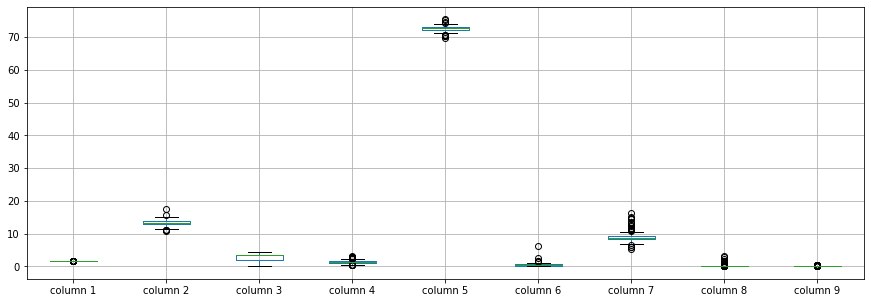

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518402
column 2    13.412632
column 3     2.623437
column 4     1.429347
column 5    72.671784
column 6     0.468053
column 7     8.969021
column 8     0.168274
column 9     0.053500
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.295533,-0.090961,-0.421039,-0.522987,-0.269044,0.846624,-0.033186,0.148307
column 2,-0.295533,1.000000,-0.286301,0.146896,-0.017964,-0.301340,-0.321773,0.326151,-0.224661
column 3,-0.090961,-0.286301,1.000000,-0.521193,-0.233790,0.090559,-0.469615,-0.488972,0.113880
column 4,-0.421039,0.146896,-0.521193,1.000000,0.040715,0.246472,-0.206037,0.413862,-0.070302
column 5,-0.522987,-0.017964,-0.233790,0.040715,1.000000,-0.129257,-0.186603,-0.074728,-0.048714
column 6,-0.269044,-0.301340,0.090559,0.246472,-0.129257,1.000000,-0.312223,-0.057993,0.020735
column 7,0.846624,-0.321773,-0.469615,-0.206037,-0.186603,-0.312223,1.000000,-0.082219,0.129521
column 8,-0.033186,0.326151,-0.488972,0.413862,-0.074728,-0.057993,-0.082219,1.000000,-0.017742
column 9,0.148307,-0.224661,0.113880,-0.070302,-0.048714,0.020735,0.129521,-0.017742,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+38,9+38+38,9+38+38+38,9+38+38+38+38,9+38+38+38+38+38,9+38+38+38+38+38+38,9+38+38+38+38+38,9+38+38+38+38,9+38+38+38,9+38+38,9+38,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 89.09269068791316
Epoch: 1 , loss: 89.13878631591797
Epoch: 2 , loss: 89.73058788592999
Epoch: 3 , loss: 89.07818310077374
Epoch: 4 , loss: 89.84529113769531
Epoch: 5 , loss: 89.42357576810397
Epoch: 6 , loss: 89.10669590876653
Epoch: 7 , loss: 89.0200418325571
Epoch: 8 , loss: 89.07823826716496
Epoch: 9 , loss: 89.73370596078726
Epoch: 10 , loss: 89.39321547288161
Epoch: 11 , loss: 89.34232389009915
Epoch: 12 , loss: 89.32876997727614
Epoch: 13 , loss: 89.02559074988731
Epoch: 14 , loss: 89.23893444354718
Epoch: 15 , loss: 89.28036675086388
Epoch: 16 , loss: 89.05370213435246
Epoch: 17 , loss: 88.96871185302734
Epoch: 18 , loss: 89.77990957406851
Epoch: 19 , loss: 89.28084916334886
Epoch: 20 , loss: 89.04310842660757
Epoch: 21 , loss: 88.8873549241286
Epoch: 22 , loss: 89.01163071852464
Epoch: 23 , loss: 88.9170901958759
Epoch: 24 , loss: 88.70985353910007
Epoch: 25 , loss: 88.36524787315956
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.269794,0.0
1,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
2,0.000000,-9.738155,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,-62.20357,-0.470719,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
210,4.190593,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
211,-1.249945,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
212,-0.860427,0.000000,0.0,0.0,0.00000,0.000000,0.0,-1.558312,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(297.77502372321527, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.27307886822412675

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.640000,4.49,1.10,71.78000,0.060000,8.75,0.269794,0.0
1,1.517610,13.890000,3.60,1.36,72.73000,0.480000,7.83,0.000000,0.0
2,1.516180,3.791845,3.55,1.54,72.99000,0.390000,7.78,0.000000,0.0
3,1.517660,13.210000,3.69,1.29,72.61000,0.570000,8.22,0.000000,0.0
4,1.517420,13.270000,3.62,1.24,10.87643,0.079281,8.07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.00,2.88,72.61000,0.080000,9.18,1.060000,0.0
210,5.707443,14.920000,0.00,1.99,73.06000,0.000000,8.40,1.590000,0.0
211,0.270705,14.360000,0.00,2.02,73.42000,0.000000,8.44,1.640000,0.0
212,0.656083,14.380000,0.00,1.94,73.61000,0.000000,8.48,0.011688,0.0


In [20]:
imputations[-1].to_excel("Glass_C_10(imp).xlsx", index=False, header=False)